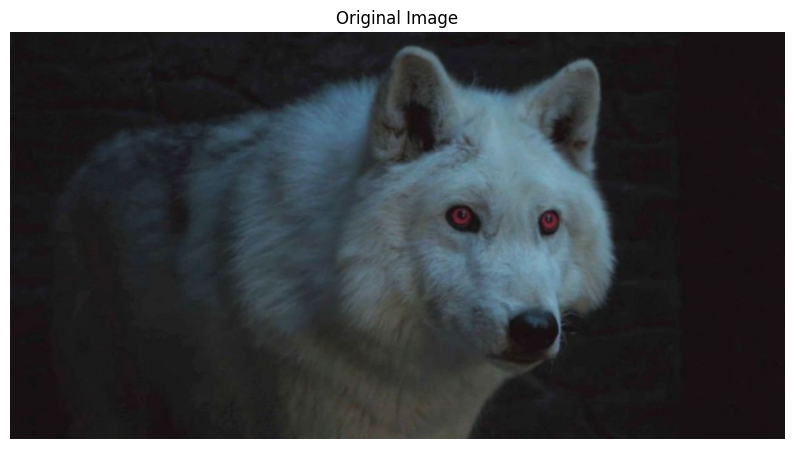

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('./image.jpg')

image_array = np.array(image)

plt.figure(figsize=(10, 8))
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')
plt.show()

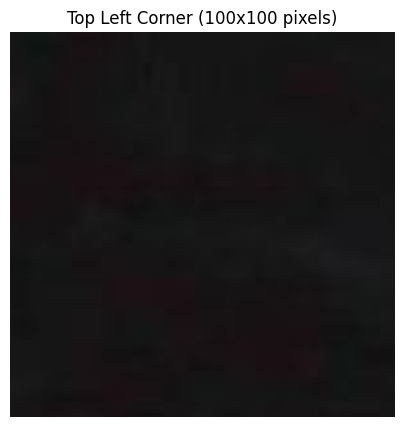

In [ ]:
top_left_corner = image_array[:100, :100]

plt.figure(figsize=(5, 5))
plt.imshow(top_left_corner)
plt.title('Top Left Corner (100x100 pixels)')
plt.axis('off')
plt.show()


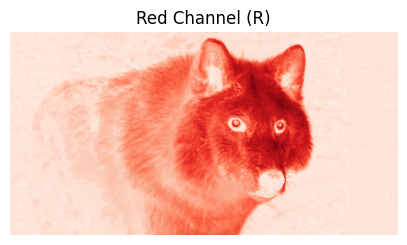

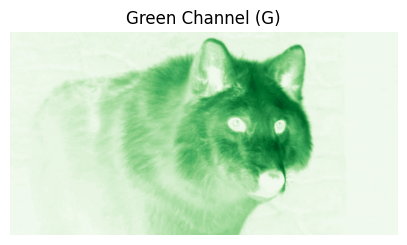

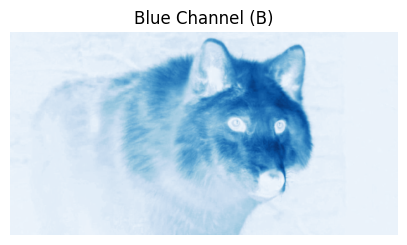

In [ ]:
# Extract the red, green, and blue channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Display the red channel
plt.figure(figsize=(5, 5))
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel (R)')
plt.axis('off')
plt.show()

# Display the green channel
plt.figure(figsize=(5, 5))
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel (G)')
plt.axis('off')
plt.show()

# Display the blue channel
plt.figure(figsize=(5, 5))
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel (B)')
plt.axis('off')
plt.show()


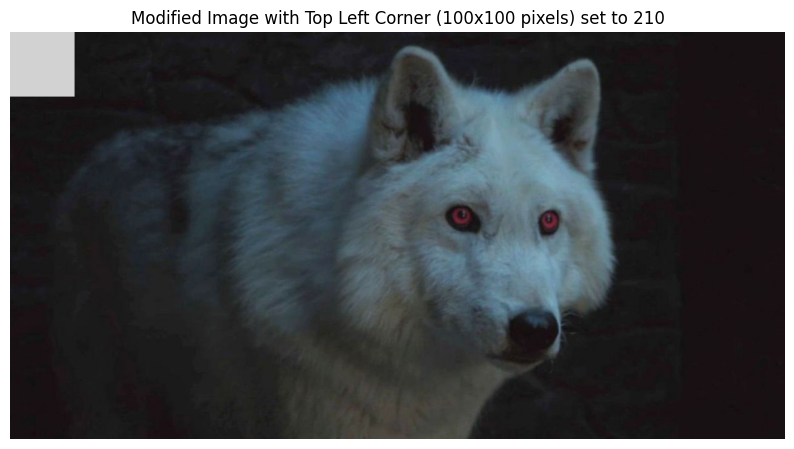

In [ ]:
modified_image = image_array.copy()
modified_image[:100, :100] = 210

plt.figure(figsize=(10, 8))
plt.imshow(modified_image)
plt.title('Modified Image with Top Left Corner (100x100 pixels) set to 210')
plt.axis('off')
plt.show()


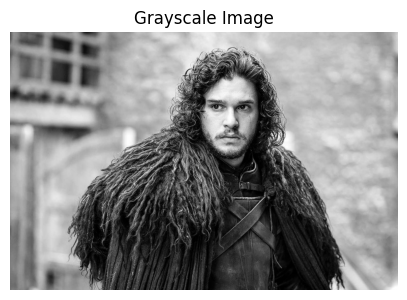

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

grayscale_image = Image.open('alpha.jpg').convert('L')

grayscale_image_array = np.array(grayscale_image)

plt.figure(figsize=(5, 5))
plt.imshow(grayscale_image_array, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


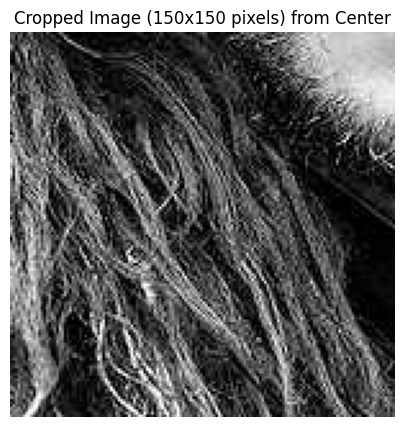

In [ ]:
height, width = grayscale_image_array.shape
center_y, center_x = height // 2, width // 2
half_crop_size = 75

cropped_image = grayscale_image_array[center_y - half_crop_size:center_y + half_crop_size,
                                      center_x - half_crop_size:center_x + half_crop_size]

plt.figure(figsize=(5, 5))
plt.imshow(cropped_image, cmap='gray')
plt.title('Cropped Image (150x150 pixels) from Center')
plt.axis('off')
plt.show()


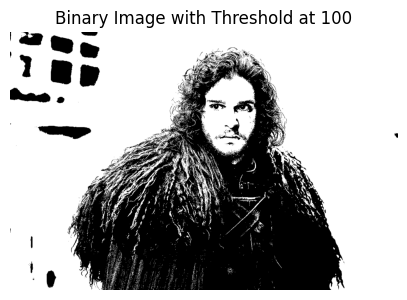

In [ ]:
binary_image = np.where(grayscale_image_array < 100, 0, 255)

plt.figure(figsize=(5, 5))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image with Threshold at 100')
plt.axis('off')
plt.show()


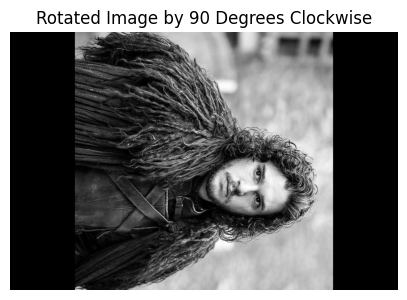

In [ ]:
rotated_image = grayscale_image.rotate(-90)

rotated_image_array = np.array(rotated_image)

plt.figure(figsize=(5, 5))
plt.imshow(rotated_image_array, cmap='gray')
plt.title('Rotated Image by 90 Degrees Clockwise')
plt.axis('off')
plt.show()


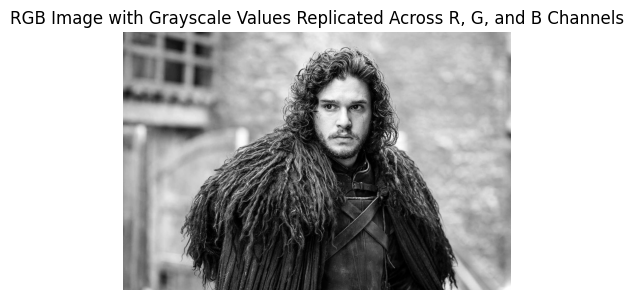

In [ ]:
rgb_image = np.stack((grayscale_image_array,) * 3, axis=-1)

plt.figure(figsize=(5, 5))
plt.imshow(rgb_image)
plt.title('RGB Image with Grayscale Values Replicated Across R, G, and B Channels')
plt.axis('off')
plt.show()


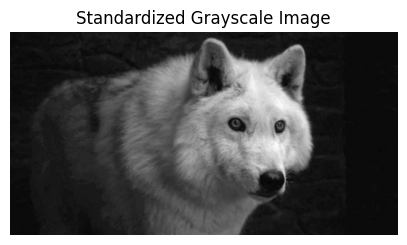

Covariance Matrix:
[[ 0.00368718  0.00344172  0.00322516 ... -0.00015906 -0.00017583
  -0.00017376]
 [ 0.00344172  0.00340794  0.00327698 ... -0.00014513 -0.00016881
  -0.00016707]
 [ 0.00322516  0.00327698  0.0033233  ... -0.00013866 -0.00016832
  -0.00016806]
 ...
 [-0.00015906 -0.00014513 -0.00013866 ...  0.00041639  0.00038533
   0.00038698]
 [-0.00017583 -0.00016881 -0.00016832 ...  0.00038533  0.00044684
   0.00045387]
 [-0.00017376 -0.00016707 -0.00016806 ...  0.00038698  0.00045387
   0.00047101]]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = 'image.jpg'
image = Image.open(image_path)

if image.mode != 'L':
    grayscale_image = image.convert('L')
else:
    grayscale_image = image

grayscale_image_array = np.array(grayscale_image)

mean = np.mean(grayscale_image_array)
std = np.std(grayscale_image_array)
standardized_image_array = (grayscale_image_array - mean) / std

covariance_matrix = np.cov(standardized_image_array, rowvar=False)

plt.figure(figsize=(5, 5))
plt.imshow(standardized_image_array, cmap='gray')
plt.title('Standardized Grayscale Image')
plt.axis('off')
plt.show()

print("Covariance Matrix:")
print(covariance_matrix)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


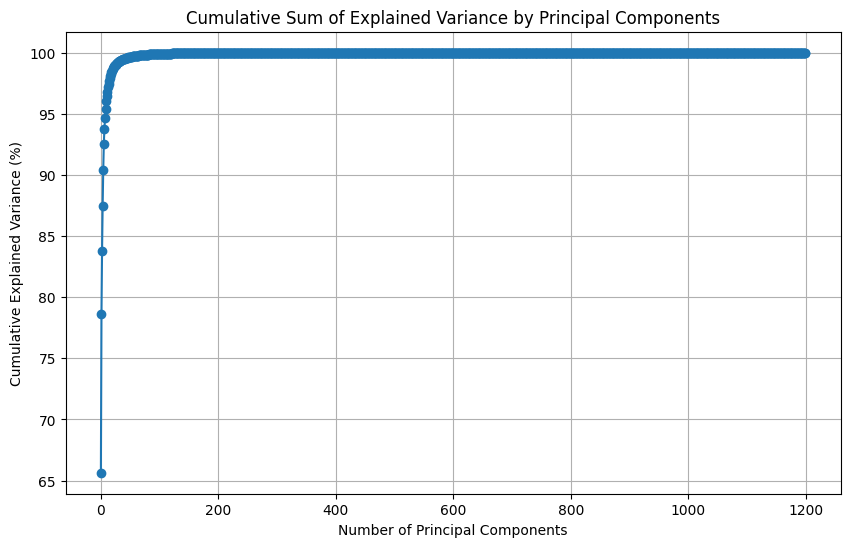

Top k Eigenvalues:
[392.1281196 +0.j  77.40305528+0.j]
Top k Eigenvectors:
[[ 1.21776074e-03+0.j -1.52615124e-03+0.j]
 [ 1.27432151e-03+0.j -1.39491235e-03+0.j]
 [ 1.32770364e-03+0.j -1.42747619e-03+0.j]
 ...
 [ 3.05804502e-05+0.j  9.79477608e-04+0.j]
 [ 2.64277921e-05+0.j  9.86212787e-04+0.j]
 [ 1.58076974e-05+0.j  9.55820062e-04+0.j]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

k = 2
sorted_indices = np.argsort(eigenvalues)[::-1]
top_k_eigenvalues = eigenvalues[sorted_indices][:k]
top_k_eigenvectors = eigenvectors[:, sorted_indices][:, :k]

cumulative_sum = np.cumsum(eigenvalues[sorted_indices])
cumulative_sum_percentage = cumulative_sum / cumulative_sum[-1] * 100

plt.figure(figsize=(10, 6))
plt.plot(cumulative_sum_percentage, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Sum of Explained Variance by Principal Components')
plt.grid(True)
plt.show()

print("Top k Eigenvalues:")
print(top_k_eigenvalues)
print("Top k Eigenvectors:")
print(top_k_eigenvectors)


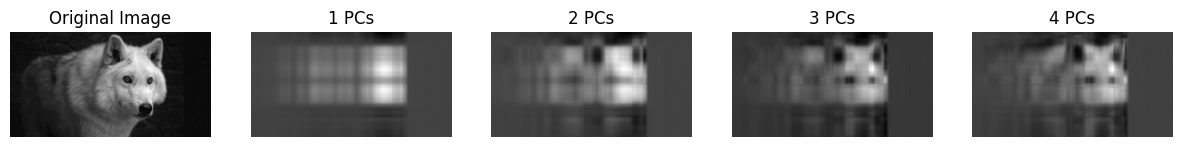

MSE with 1 PCs: 0.46547275485644607
MSE with 2 PCs: 0.39664543255415785
MSE with 3 PCs: 0.36156010566496277
MSE with 4 PCs: 0.33605174021998313


In [ ]:
lower_dimensional_representation = np.dot(standardized_image_array, top_k_eigenvectors)

combinations = [1, 2, 3, 4]
reconstructed_images = []

for num_components in combinations:
    selected_eigenvectors = eigenvectors[:, sorted_indices][:, :num_components]
    lower_dimensional_rep = np.dot(standardized_image_array, selected_eigenvectors)
    reconstructed_image = np.dot(lower_dimensional_rep, selected_eigenvectors.T)
    # Convert the reconstructed image to real values
    reconstructed_image = reconstructed_image.real
    reconstructed_images.append(reconstructed_image)

fig, axes = plt.subplots(1, len(combinations) + 1, figsize=(15, 5))

axes[0].imshow(standardized_image_array, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, num_components in enumerate(combinations):
    axes[i + 1].imshow(reconstructed_images[i], cmap='gray')
    axes[i + 1].set_title(f'{num_components} PCs')
    axes[i + 1].axis('off')

plt.show()

for i, num_components in enumerate(combinations):
    mse = np.mean((standardized_image_array - reconstructed_images[i]) ** 2)
    print(f'MSE with {num_components} PCs: {mse}')